# The Heckscher-Ohlin model

Imports and set magics:

In [24]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import seaborn as sns

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The Heckscher-Ohlin model (HO) is an economic theory that explains differences in national economies' trade patterns based on factor endowments. It posits that countries will export goods that intensively use their abundantly available factors and import goods that intensively use their scarce factors.

***Model Assumptions***
- Two Countries: Denmark (capital-abundant) and China (labor-abundant).
- Two Goods: Wind power (capital-intensive) and textiles (labor-intensive).
- Two Factors of Production: Capital (K) and labor (L).
- Free Movement of Factors: Across sectors within each country.
- Identical Preferences and Utility Functions: Same utility functions reflect similar consumption preferences.
- Perfect Competition: No individual buyer or seller has market power.
- No Transportation Costs or Trade Restrictions: Goods flow freely between countries

**The model equations**

Each country are able to allocate input (labor and capital) for the production of either windmills or textile. We assume classical Cobb-Douglas production functions as following (Denmark Windmills, Denmark textiles, China Windmills, China Textiles):

\begin{align*}
P_{DK,W} = K_{DK,W}^{\alpha_{DK,W}} \times L_{DK,W}^{\beta_{DK,W}} \\
P_{DK,T} = K_{DK,T}^{\alpha_{CN,T}} \times L_{DK,T}^{\beta_{CN,T}}\\
P_{CN,W} = K_{CN,W}^{\alpha_{DK,W}} \times L_{CN,W}^{\beta_{DK,W}}\\
P_{CN,T} = K_{CN,T}^{\alpha_{CN,T}} \times L_{CN,T}^{\beta_{CN,T}}
\end{align*}


where K and L are the capital and labour inputs for DK and CN allocated towards windmills (W) or Textiles (T).
$\alpha$ and $\beta$ are the output elasticities for capital and labor ($\alpha+\beta$=1), indicating the responsiveness of output to a change in input quantities. 
Each production function reflects how inputs (capital and labor) are transformed into outputs (wind power or textiles), considering the factor intensities specific to each country.


The utility functions for DK and CN are respectively given by:

\begin{align*}
U_{DK} = (P_{DK,W} + P_{CN,W})^{\rho} + (P_{DK,T} + P_{CN,T})^{\rho}\\
U_{CN} = (P_{CN,T} + P_{DK,T})^{\rho} + (P_{CN,W} + P_{DK,W})^{\rho}
\end{align*}
, where the utility function sums the utilities derived from all goods produced and consumed in Denmark or China, reflecting preferences for diversity in consumption and the substitution effects between goods. $\rho$ is the Elasticity of substitution in the utility function, influencing how consumption of different goods substitutes for one another.


Furthermore we add the following ressource constraints for capital and labor for each country:
\begin{align*}
K_{DK,W} + K_{DK,T} \leq K_{DK}\\
L_{DK,W} + L_{DK,T} \leq L_{DK}\\
K_{CN,W} + K_{CN,T} \leq K_{CN}\\
L_{CN,W} + L_{CN,T} \leq L_{CN}
\end{align*}

These constraints ensure that the allocation of resources does not exceed available resources in each country, maintaining a balance between capital and labor inputs across different sectors.

Each of these equations is integral to understanding how resources are allocated, how they are transformed into products, and how these products generate utility, reflecting the interconnected nature of global economies.

**The optimal use of capital and labor**

Market equilibria ensure that wage rates and returns to capital are equal across sectors within each country:

\begin{align*}
\frac{P_w}{P_x} &= \frac{MPL_x}{MPL_w} \\
\frac{P_w}{P_x} &= \frac{MPK_x}{MPK_w}
\end{align*}

These equations align the ratios of prices to the marginal products of labor and capital across different goods.





**Solving the model**
Firstly we initialize the model, by defining the initial values for parameters such as factor endowments (capital and labor) and elasticities for both countries are set.

Then we define the objective function, which calculates the negative utility for both Denmark and China, summing up the utilities derived from the production of windmills and textiles. The function is designed to maximize this total utility by minimizing its negative value.

Then the resource constraint are defined for the limitations on capital and labor such that their allocations do not exceed the available amounts in each country. It also ensures non-negativity of the variables.

We then run the optimization, where the method calls the minimize, providing the objective function, initial guesses for variable values, constraints, and the optimization method (SLSQP). 
The function adjusts the allocations of capital and labor to find the optimal values that maximize utility.


By employing these steps, the model numerically determines how capital and labor should be distributed across sectors and countries to maximize the overall utility, reflecting the economic principles of the Heckscher-Ohlin model.

## Numerical solution

First we import our class defined in the py file and make an instance of it to use through out the model project.

In [25]:
# We import our class
from modelproject import HOmodelClass 

# We create an instance of the class
economy = HOmodelClass()

Now we run the numerical solution. We show the alloctaion before trade (autarchy), where the countries can be observed as closed economies, and after trade where the economies open up and trade to try to maximize the countires utility. This should be possible due to specialisation within the countries as Denmark is capital abundant and China is labor abundant. 

In [26]:

# Before trade results
try:
    allocations_before, U_DK_before, U_CN_before = economy.before_trade()
    print("\nBefore Trade:")
    for country, resources in allocations_before.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Textiles']:.2f}, Total Production Windmills: {resources['Production_Windmills']:.2f}, Total Production Textiles: {resources['Production_Textiles']:.2f}")
    print(f"Denmark's Utility: {U_DK_before:.2f}, China's Utility: {U_CN_before:.2f}")
except Exception as e:
    print(e)

# After trade results
try:
    allocations, U_DK, U_CN = economy.run_optimization()
    print("\nAfter Trade:")
    for country, resources in allocations.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Textiles']:.2f}, Total Production Windmills: {resources['Production_Windmills']:.2f}, Total Production Textiles: {resources['Production_Textiles']:.2f}")
    print(f"Denmark's Utility: {U_DK:.2f}, China's Utility: {U_CN:.2f}")
except Exception as e:
    print(e)


Before Trade:
DK - K_Windmills: 100.00, L_Windmills: 50.00, K_Textiles: 0.00, L_Textiles: 0.00, Total Production Windmills: 81.23, Total Production Textiles: 0.00
CN - K_Windmills: 0.00, L_Windmills: 0.00, K_Textiles: 50.00, L_Textiles: 100.00, Total Production Windmills: 0.00, Total Production Textiles: 81.23
Denmark's Utility: 9.01, China's Utility: 9.01

After Trade:
DK - K_Windmills: 96.25, L_Windmills: 41.25, K_Textiles: 3.75, L_Textiles: 8.75, Total Production Windmills: 74.65, Total Production Textiles: 6.79
CN - K_Windmills: 8.75, L_Windmills: 3.75, K_Textiles: 41.25, L_Textiles: 96.25, Total Production Windmills: 6.79, Total Production Textiles: 74.65
Denmark's Utility: 18.05, China's Utility: 18.05


The results from the above illustrate how trade impacts the production and utility in Denmark and China:

**Before Trade:**
Denmark fully utilizes its capital and labor in windmill production, reflecting its capital-abundant nature and the capital intensity of windmills. With all resources allocated to windmills, Denmark achieves a production output of 81.23 but produces no textiles. This results in a utility of 9.01, solely derived from windmill production.
China, on the other hand, allocates all its resources to textile production, capitalizing on its labor-abundant nature and the labor intensity of textiles. It similarly achieves a production output of 81.23 in textiles with no windmill production, leading to the same utility level as Denmark, 9.01.

**After Trade:**
Denmark shifts a small amount of capital and labor to textile production after trade, allowing it to benefit from the diversity of goods. This diversification slightly reduces its windmill production but increases total utility to 18.05 due to the access to both goods.
China does the reverse, allocating some resources to windmill production while still focusing predominantly on textiles. This leads to increased utility through enhanced access to both goods, mirroring Denmark's utility increase to 18.05.
Post-trade, both countries experience a significant utility gain, demonstrating the benefits of trade in allowing countries to consume a variety of goods beyond what they can produce alone. This increased utility reflects improved overall well-being due to consumption diversity and the economic benefits of trade specialization.

**Utility functions explained:** In the before_trade method of the model, Denmark and China only produce one type of good each—windmills and textiles, respectively—based on their factor endowments. The utility functions as implemented consider only the produced good for each country, setting the consumption of the non-produced good to zero:

Denmark produces only windmills, and its utility is calculated based on the production of windmills alone, with textile consumption implicitly set to zero.
China produces only textiles, and its utility is calculated similarly, with windmill consumption set to zero.
This setup underscores the initial specialization based on factor endowments but does not account for any benefit derived from the non-produced good in each country due to the lack of trade. The utility functions calculate the total utility for each country based on their own production, reflecting the limitation of autarky where each country can only consume what it produces. This may lead to lower utility levels compared to a post-trade scenario where both goods would be available in each country, allowing for increased utility through diversified consumption.

## Visualising the change in utility

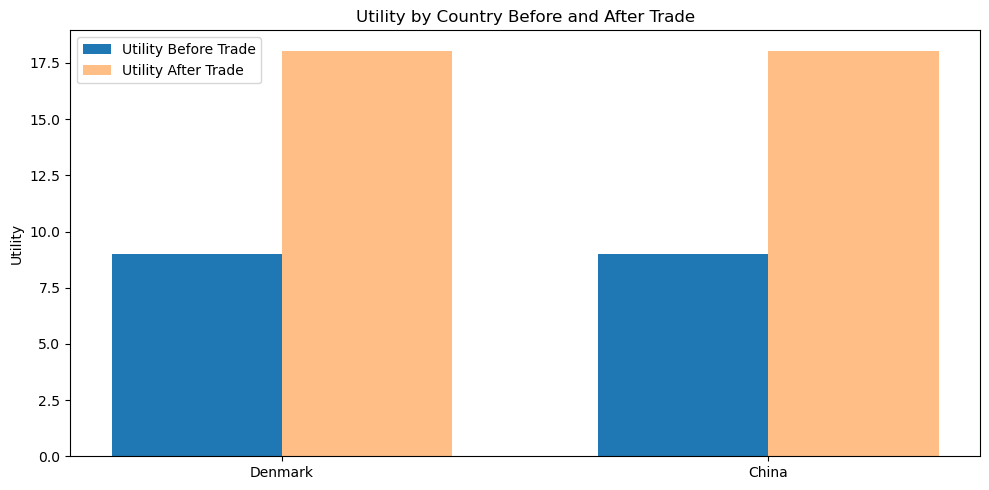

In [27]:
economy.plot_trade_results()

The graph above shows the results explained above, here it is just visualized. We see that the utility increases for both countries from 9.01 to 18.05. This implies that both countries gain from trade. 

Now we will show the Production Possibility Frontier for both countries.

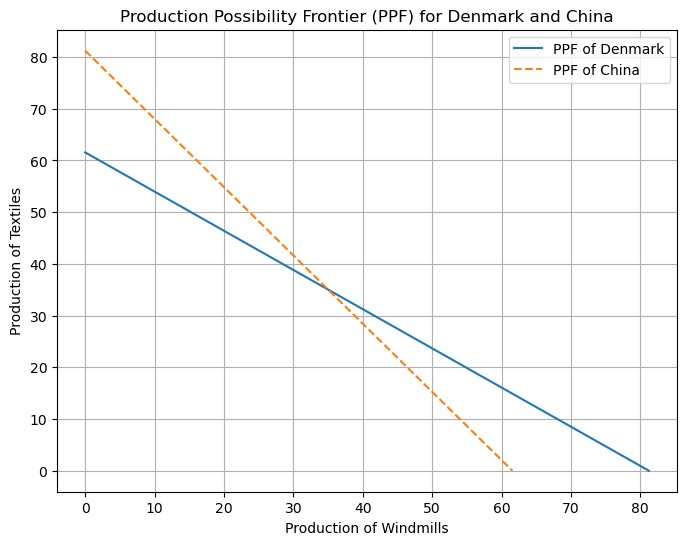

In [28]:
economy.plot_ppf()

The PPF's above show the possible production combinations for China and Denmark. From the above it's clear that before trade Denmark has the comparative advantage of production of windmills, where China has the comparative advantage of the production of textile. At the crossing point both countries have the same opportunity costs. Trade is driven by opportunity costs. No comparative advantage at the intersect, which reduces the incentive to trade at the specific output level for the intersect. 

# Further analysis - change in parameters

Below we can see how utility changes for the countries given the parameters $\alpha, \beta$ and $\rho$ changes.



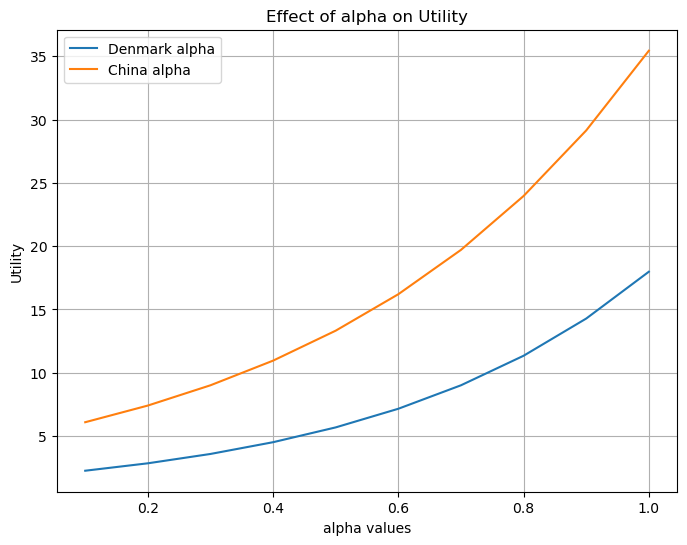

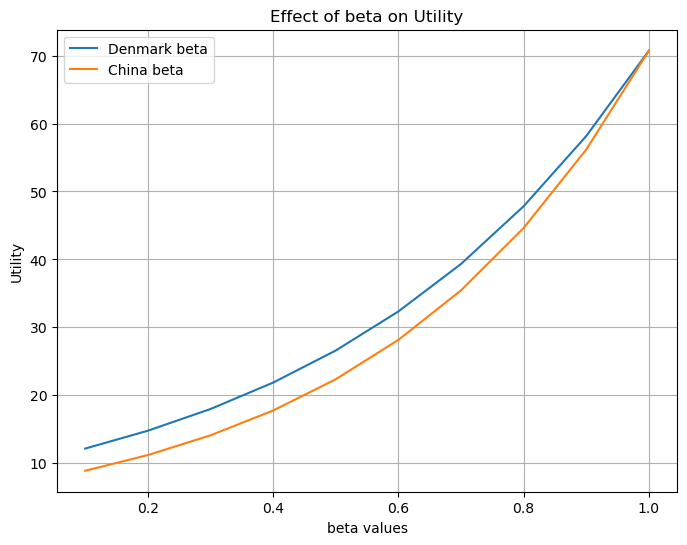

In [29]:
alpha_values = np.linspace(0.1, 1, 10)  # Example range of alpha values
beta_values = np.linspace(0.1, 1, 10)   # Example range of beta values

economy.plot_parameter_effect_combined(alpha_values, 'alpha', 'utility')
economy.plot_parameter_effect_combined(beta_values, 'beta', 'utility')

$\alpha$ interpretation: $\alpha$ is the capital share in the production function. From the graph above we see that an increase in $\alpha$ implies an increase in the utility for both countries. Surprisingly Chinas gain in utility is increasing more than Denmarks, though we would expect the opposite since China is labor abundant. This could be due to several reasons, one being the law of diminishing marginal product, as China initially has a lower endowment of capital, the marginal gain of capital might be higher per unit compared to Denmark that has an initially higher endowment of capital. 

$\beta$ interpretation: both graphs are almost alike and shows exponentially growth as $\beta$ rises. $\beta$ meassures the responsiveness of output to change in labor input (capital kept constant). This implies that as $\beta$ increases labor is becoming a more and more important input to the production. The graph shows that Chinas utility increases relatively more compared to Denmark, given higher values of $\beta$. This implies that labor is a more important input in Chinas production (even though the difference is minimal). 

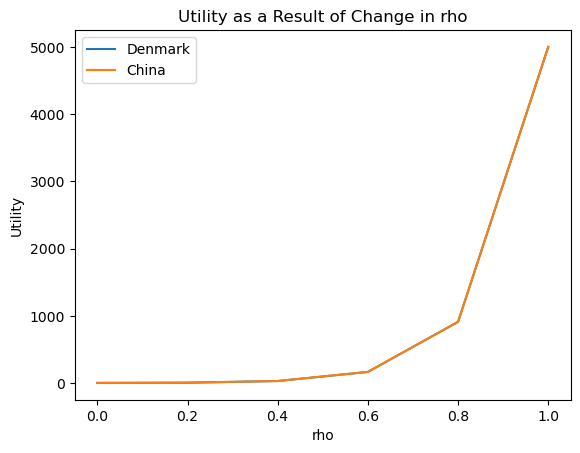

In [30]:
# Define values for rho
rho_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1]

# Call the plot_rho_effect method
economy.plot_rho_effect_utility(rho_values)


In our model $\rho$ is a parameter for risk aversion. With $\rho$ being equal to 0.5, this implies that the law of diminishing marginal product is observed for our model. This value of $\rho$ in our model implies moderate risk aversion where each additional quantity of a good is valued at a decreasing rate. From the graph we observe that both countries have the same utility for the same values of $\rho$. We see that there is a non-linear increase in utility with increases in $\rho$, where it increases more and more as $\rho$ approaches 1. This is consistent with the law of diminishing returns, where ultimately $\rho = 1$ implies a linear relationship with consumption. 



## Extension of the model - CES production function

To try and make an extension of the model we will change the production function of the model. The Cobb-Douglas production function will in this section be exchanged with a CES production function. This implies that we also need to change the utility function to match the CES.

The CES utility function is more alligned with economic theory considering how consumers make trade-offs between different goods. The additive utility function used up until now does not include such trade-off, as the utility is derived independently of each good. 

In [31]:

# Before trade results
try:
    allocations_before, U_DK_before, U_CN_before = economy.before_trade_ces()
    print("\nBefore Trade:")
    for country, resources in allocations_before.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Textiles']:.2f}, Total Production Windmills: {resources['Production_Windmills']:.2f}, Total Production Textiles: {resources['Production_Textiles']:.2f}")
    print(f"Denmark's Utility: {U_DK_before:.2f}, China's Utility: {U_CN_before:.2f}")
except Exception as e:
    print(e)

# After trade results
try:
    allocations, U_DK, U_CN = economy.run_optimization_ces()
    print("\nAfter Trade:")
    for country, resources in allocations.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Textiles']:.2f}, Total Production Windmills: {resources['Production_Windmills']:.2f}, Total Production Textiles: {resources['Production_Textiles']:.2f}")
    print(f"Denmark's Utility: {U_DK:.2f}, China's Utility: {U_CN:.2f}")
except Exception as e:
    print(e)


Before Trade:
DK - K_Windmills: 100.00, L_Windmills: 50.00, K_Textiles: 0.00, L_Textiles: 0.00, Total Production Windmills: 100.00, Total Production Textiles: 0.00
CN - K_Windmills: 0.00, L_Windmills: 0.00, K_Textiles: 50.00, L_Textiles: 100.00, Total Production Windmills: 0.00, Total Production Textiles: 50.00
Denmark's Utility: 100.00, China's Utility: 50.00

After Trade:
DK - K_Windmills: 50.00, L_Windmills: 25.00, K_Textiles: 50.00, L_Textiles: 25.00, Total Production Windmills: 50.00, Total Production Textiles: 50.00
CN - K_Windmills: 25.00, L_Windmills: 50.00, K_Textiles: 25.00, L_Textiles: 50.00, Total Production Windmills: 25.00, Total Production Textiles: 25.00
Denmark's Utility: 150.00, China's Utility: 150.00


Aligned with the previous model, Denmark is still specialized in windmills and China is still spesialized in textile, where both countries utilize all their capital/labor for their respective production. 

Before trade we see that Denmark has double the utility that China does, whereas when trade has occured they obtain the same amount of utility. This implies that China gains relatively more by trading, than Denmark does. Why this is the case is unclear, as both countries equally improve the trade-off possibility for consumers, reflected in the CES production function.

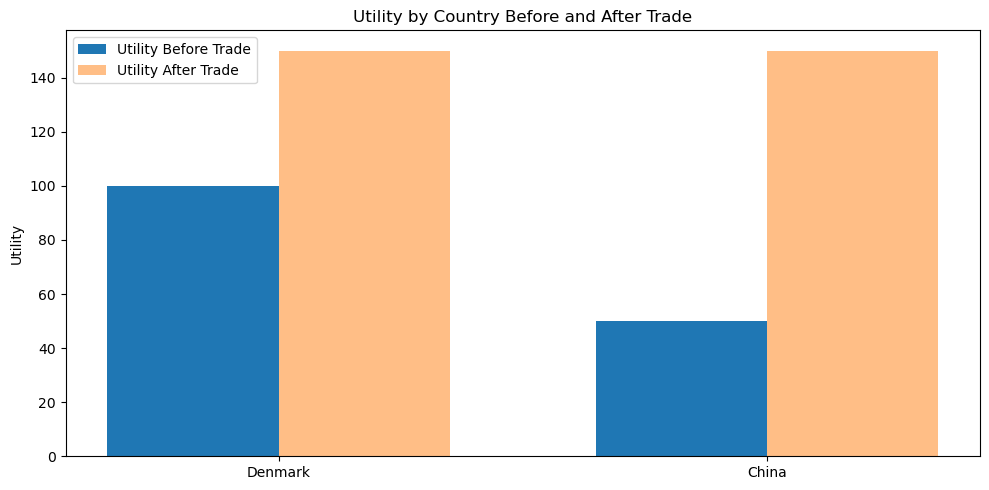

In [32]:
# Plotting the results from introducing trade (using CES production function)
economy.plot_trade_results_ces()

Again, we show the production possibility frontiers (PPF's) for Denmark and China, reflecting the possible combinations of production output, based on their initial endowments and production functions.

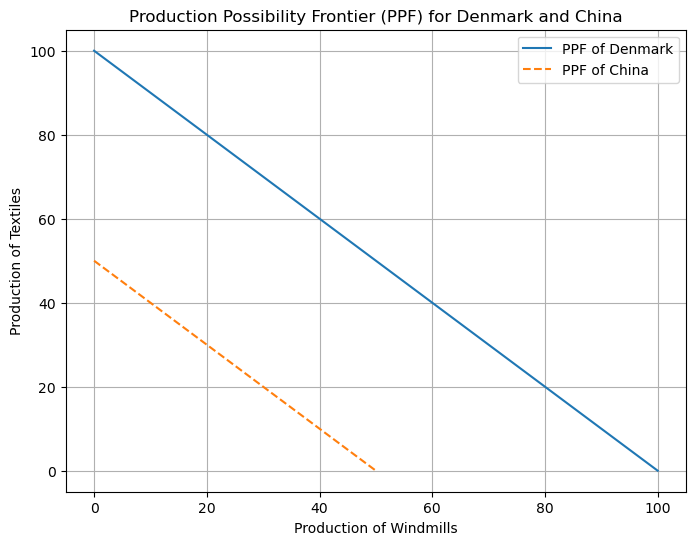

In [33]:
economy.plot_ppf_ces()

The graph shows the possible combination of production for each country. We see that Denmark generally lies at a higher level, meaning the possible combinations of windmills and textile production is greater, than what China could choose to produce - no matter the combination of factor inputs. This is not surprising, as per the CES production function now only takes $\alpha$ as input, leaving out $\beta$, which means a higher exploitation of capital in production ($\alpha = 0.7$) favors Denmark that is capital abundant. The exploitation of labor is now left to $1-\alpha = 0.3$, which is why China would now be left with a smaller production ability. More specifically, China can now produce only half of Denmark's windmills and textile production ability. 

Again, we check for the effect of our parameter choices. 
In this case, however, it is clearer to see how the production function relies entirely upon $\alpha$. As $\alpha$ increases, the productivity of Denmark's use of capital in production of especially windmills increases. This increases the utility achieved. The case for China is opposite due to the negative effect on labor productivity, as discussed above.

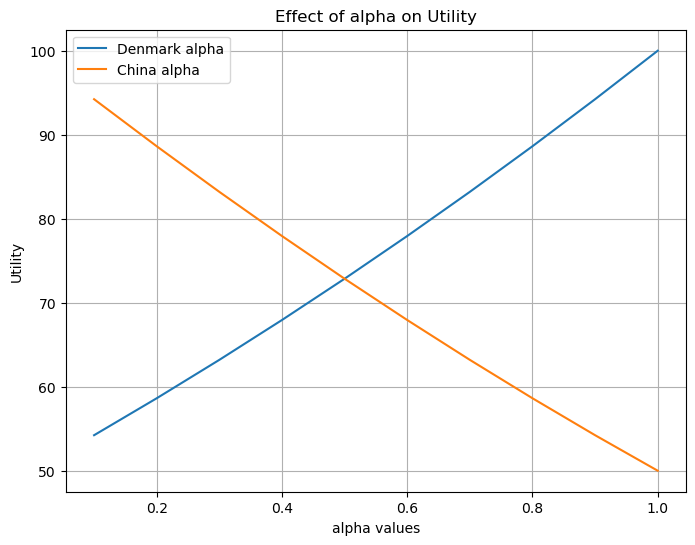

In [34]:
alpha_values = np.linspace(0.1, 1, 10)  # Example range of alpha values

economy.plot_parameter_effect_combined_ces(alpha_values, 'alpha', 'utility')

Next, we check for the effects from changes in $\rho$. 

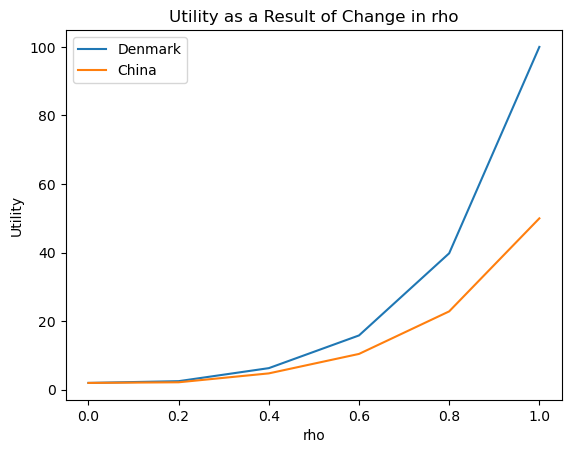

In [35]:
# Define values for rho
rho_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1]

# Call the plot_rho_effect method
economy.plot_rho_effect_utility_ces(rho_values)

The utility in both Denmark and China increases when $\rho$ increases. Though Denmarks utility increase more, which indicates greater flexibility in substituting capital and labor. This might be due to Denmarks capital abundance, as the substituion becomes easier. Denmark can leverage its abundant capital more effectively even when less labor is available, thus increasing overall production efficiency and utility. This increasing utility is also the case for China, even though China is labor-abundant. Being able to substitute capital for labor more freely still benefits its economy, possibly by allowing more efficient use of existing capital resources.

# Conclusion

Anna: Kan du skrive noget konklusion?